In [ ]:
import pandas as pd

# Introduction to your own data

In [ ]:
# read in exemplary data





In [ ]:
# display a few rows of the data that we just read in




In [ ]:
# get a description of the data




In [ ]:
# Save the description of the data as an Excel file





# Concatenating DataFrames

### Two DataFrames can be concatenated like this:

In [ ]:
df_cof_dctest_01 = pd.read_excel("data/original_data/insite.dce_COF_DCTest_main (01).xlsx")
df_cof_dctest_02 = pd.read_excel("data/original_data/insite.dce_COF_DCTest_main (02).xlsx")

df_concatenated = pd.concat([df_cof_dctest_01, df_cof_dctest_02])

### Let's check the length of the two original DataFrames and the new combined one

In [ ]:
print("Length of the first DataFrame: " + str( len(df_cof_dctest_01) ))
print("Length of the first DataFrame: " + str( len(df_cof_dctest_02) ))
print("Length of the concatenated DataFrame: " + str( len(df_concatenated) ))

### Try to concatenate the first two insite.dce_final_main Excel files to one DataFrame!

In [ ]:
# Enter your code below this comment







In [ ]:
# Enter code to check if your concatenation was successful




### Here is a solution to concatenate all Excel files that belong together

In [ ]:
import os

# os.listdir() generates a list of all elements in a certain directory. The directory has to be specified inside the 
# parantheses of the listdir() function.

for file in os.listdir("data/original_data/"):   # this for loop prints all files inside the "original_data" folder
    print(file)

The dc_final_main-files and the dce_COF_DCTest_main-files need to concatenated!

In [ ]:
def concat_excel_tables(distinct_name):
    """
    This function can be used to read in multiple Excel files and return a concatenated DataFrame containing the data
    from the Excel files.
    -------------
    ...distinct_name: a string that is included in the names of the files that are to be concatenated 
    """
    # get a list of all data inside the original_data folder
    files = os.listdir("data/original_data")
    
    # create a list that only contain the distinct_name in their file name (i.e. a list with the target files)
    target_files = [f for f in files if distinct_name in f]

    # create an empty list "data" and a counter "i"
    data = []
    i = 0

    # iterate through the list with all target file names
    for file in target_files:
        i += 1
        # read in the current file from an Excel file and append it to the data list
        data.append(pd.read_excel("data/original_data/"+file))
        # print the progress of the read-in process
        print("%s of %s files are read in!" % (i, len(target_files)))
    
    # concatenate all DataFrames that were just added to the data list
    df = pd.concat(data, axis=0, sort=False, ignore_index=True)

    return df

In [ ]:
df_final_main = concat_excel_tables("insite.dce_final_main")

### Try to use the function to concatenate all the dce_COF_DCTest_main Excel files to one DataFrame. Then save the DataFrame to a CSV file

In [ ]:
# use the function defined above to concat the dce_COF_DCTest_main Excel files  



In [ ]:
# save the concatenated data to a CSV file



# Merging DataFrames

The data/preprocessed_data/csv_original_data folder contains CSV files for all data provided. Data that had to be concatenated are already concatenated!

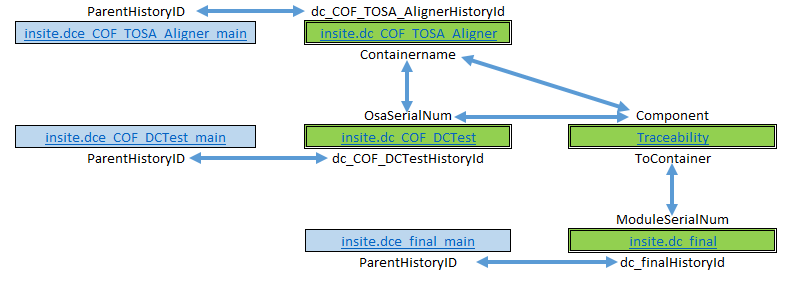

### Merging the COF_TOSA_Aligner data

The CSV files contain the indexes of the respective DataFrames that were saved to the files. If we just read them in again as DataFrames, pandas would create new indexes and the old index would be treated as a normal column. To avoid this we specify "index_col=0". Now the old index (which is in column 0 of the CSV files) will be used as index.

In [ ]:
df_tosa_main = pd.read_csv("data/preprocessed_data/csv_original_data/insite.dce_COF_TOSA_Aligner_main.csv", index_col=0)
df_tosa = pd.read_csv("data/preprocessed_data/csv_original_data/insite.dc_COF_TOSA_Aligner.csv", index_col=0)

In [ ]:
# Check the shapes (i.e. the number of rows and columns) of the DataFrames
print(df_tosa_main.shape)
print(df_tosa.shape)

In [ ]:
df_tosa_merged = df_tosa_main.merge(df_tosa,
                                    left_on="ParentHistoryID",
                                    right_on="dc_COF_TOSA_AlignerHistoryId",
                                    suffixes=("_tosa", "_tosa_main"))

In [ ]:
# Check the shape of the merged DataFrame
print(df_tosa_merged.shape)

In [ ]:
df_tosa_merged.to_csv("df_tosa_merged.csv")

### Try to merge the COF_DCTest data and save it in a file!

In [ ]:
# Enter your code here. Also check if the merge was successful (utilizing the .shape() method, which was also used above)




In [ ]:
# Check if the shape of your merged DataFrame looks reasonable like we did in the example




In [ ]:
# save the merged DataFrame to a file



### Try to merge the (previously merged) tosa aligner data with the (also previously merged) dctest data

# Basic Preprocessing

### Drop all columns that only contain missing values (using for instance your merged DataFrame)

In [ ]:
# Enter your code here





### Drop all columns with 0 variance (i.e. there is only one unique value in the column)

In PartNum there seems to be only one unique value. However there are missing values as well:

In [ ]:
df_tosa_merged["PartNum"].unique()

The following line of code allows us to get an array (similar to a list) of all unique (non-missing) values:

In [ ]:
df_tosa_merged["PartNum"].dropna().unique()

Using the len() function we can check the number of unique values.

In [ ]:
len(df_tosa_merged["PartNum"].dropna().unique())

We can get all columns of a DataFrame as follows:

In [ ]:
df_tosa_merged.columns

In [ ]:
# Let's iterate through all columns and drop all that only contain one unique value.
# (using DataFrame.drop(columns=column_name))





### Let's read in the all_data.csv file from data/preprocessed_data/csv_without_empty_cols_and_merged
For this data
- all empty columns were already removed
- also all columns without any variance were removed
- moreover, all columns that were used as key to merge the data and all remaining columns having "ID" or "Id" in their name were dropped
- additionally I dropped all columns from final, that were not declared as relevant output by you

(Having no domain expertise regarding your data, I decided to neglect the Ids, as they provide no Information to me. If they contain valuable information to you, you should later create your own merged data file which still contains the Ids.)

In [ ]:
df_all = pd.read_csv("data/preprocessed_data/csv_without_empty_cols_and_merged/all_data.csv", index_col=0)

In [ ]:
df_all.head()

### Let's handle all those -99999 and -9999 values

In [ ]:
df_all.min()

In [ ]:
# Enter code to treat -99999 and -9999 as missing values




In [ ]:
df_all.min()

# Dropping duplicates

In [ ]:
# Check how many rows our data currently has
print(df_all.shape)

In [ ]:
# Enter code here





In [ ]:
# Check if duplicates were removed
df_all.shape

# Taking care of the almost empty rows (from the final_main data)

display() is only available for Jupyter Notebooks. It will displayer DataFrames in a nicer form than print() does.

In [ ]:
display(df_all.head(10))

Lets for example check how many missing values we find in the second row (index = 1) of the DataFrame

In [ ]:
df_all.loc[1,].isna().sum()

(compared to the final_main Excel file, we see only very few missing values. That is because all final columns that were not specified as relevant output in your use case description have been dropped by me)

### Let's drop all rows that contain at least 14 missing values

Use "df_all.dropna?" to find the correct parameters for the dropping process

In [ ]:
df_all.dropna?

In [ ]:
# Enter code here



df_all.dropna(axis=0, thresh=75, inplace=True)

# Fill missing values with the median

In [ ]:
df_all.isna().sum()

In [ ]:
# Enter code here






In [ ]:
df_all.isna().sum()

# Save your preprocessed data!

In [ ]:
# Enter code here





# Creating a scatter plot

In [ ]:
% matplotlib qt

# import the required library (matplotlib.pyplot). It is usally imported as the alias "plt"



def plot_scatter(x, y):
    # Enter your code here to create a scatter plot
    
    # first create a new figure
    
    # now create the scatter plot
    
    # Add an x-axis and a y-axis label to your plot
    
    # show the scatter plot
    
    

### Explore the following combinations with your scatter plot function:
- WIGGLE_pMAX_W vs. TxOma_mW
- T_PO_W vs. TxOma_mW
- VI_KINK vs. Ldi_mA
- T_PO_dBm vs. TxPower_dBm
- SLOPE_WperA vs. TxPower_dBm
- R_LD_ohm vs TxCrossing_pct

You can get the corresponding data from the DataFrame that we previously preprocessed

In [ ]:
# Use your scatter function here



